In [2]:
%load_ext autoreload
%autoreload 2

# Chloropleth Plots for Stats about articles

For example: median views, number of articles, etc

In [3]:
import pandas as pd
import numpy as np

## Load and Preprocess Base DataFrames

In [4]:
df_crawled = pd.read_csv('data/events/all_events.csv.gz').drop_duplicates()

df_crawled.event_date = pd.to_datetime(df_crawled.event_date)
df_crawled['views_7_sum_log'] = np.log1p(df_crawled.views_7_sum)
df_crawled['edits_7_sum_log'] = np.log1p(df_crawled.edits_7_sum)

df_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1))]
df_view_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1)) & (
                                     df_crawled.views_7_sum > 10)]
df_edit_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1)) & (df_crawled.edits_7_sum > 0)]

## Plot Chloropleth maps for raw article stats

In [5]:
from util.plot import build_chloropleths_df
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'sans-serif',
                     'font.sans-serif': 'Noto Sans'})

### Median Views and Edits

views_7_sum_log_country_code_median_de
views_7_sum_log_country_code_median_en
views_7_sum_log_country_code_median_es
views_7_sum_log_country_code_median_it


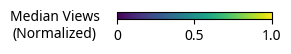

In [7]:
figs_geo, fig_cmap = build_chloropleths_df(df_view_reg, column='views_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en', cm_chloropleth=mpl.cm.viridis,
                                           relative_scale=True, metric='median', cb_horizontal=True,
                                           cb_label='Median Views\n(Normalized)')
# if you want to see the figures here, uncomment this
#for fig in figs_geo:
#    display(fig)

edits_7_sum_log_country_code_median_de
edits_7_sum_log_country_code_median_en
edits_7_sum_log_country_code_median_es
edits_7_sum_log_country_code_median_it


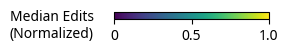

In [8]:
figs_geo, fig_cmap = build_chloropleths_df(df_edit_reg, column='edits_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='median',
                                           cb_horizontal=True, cb_label='Median Edits\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

### Number of articles with >10 views and >0 edits

views_7_sum_log_country_code_count_de
views_7_sum_log_country_code_count_en
views_7_sum_log_country_code_count_es
views_7_sum_log_country_code_count_it


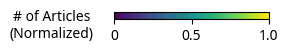

In [9]:
figs_geo, fig_cmap = build_chloropleths_df(df_view_reg, column='views_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='count',
                                           cb_horizontal=True, cb_label='# of Articles\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

edits_7_sum_log_country_code_count_de
edits_7_sum_log_country_code_count_en
edits_7_sum_log_country_code_count_es
edits_7_sum_log_country_code_count_it


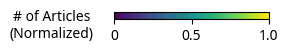

In [11]:
figs_geo, fig_cmap = build_chloropleths_df(df_edit_reg, column='edits_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='count',
                                           cb_horizontal=True, cb_label='# of Articles\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

## Internet accessibility vs. access from country to wiki
views_baseline describes the access from a certain county towards a Wiki in a specific period. It should act as a proxy for internet access, as Wikipedia is one of the most essential sites on the internet and frequently accessed, if internet access is available.

In [6]:
from util.preprocessing import replace_country_names

In [56]:
df_population = df_crawled[df_crawled.code == 'en'][['code', 'country', 'year', 'population', 'views_baseline', 'view_country_article', 'GDP_pc']].drop_duplicates()
df_population['population_log'] = np.log(df_population.population)
df_population['views_baseline_log'] = np.log1p(df_population.views_baseline)
df_population['view_country_article_log'] = np.log1p(df_population.view_country_article)
df_population['GDP_pc_log'] = np.log(df_population.GDP_pc)

df_int_perc = pd.read_csv('data/supp/internet_percentage.csv')[['Country Name', '2015', '2016', '2017', '2018', '2019', '2020']].rename(
    {'Country Name': 'country'}, axis=1)
replace_country_names(df_int_perc, inplace=True)
df_int_perc[['2015', '2016', '2017', '2018', '2019', '2020']] = df_int_perc[['2015', '2016', '2017', '2018', '2019', '2020']] / 100
df_int_perc = df_int_perc.melt('country', ['2015', '2016', '2017', '2018', '2019', '2020'], 'year', 'internet_percentage')
df_int_perc.year = df_int_perc.year.astype(int)

df_population = df_population.merge(df_int_perc, on=['country', 'year'], how='left')
df_population['internet_raw'] = df_population.population * df_population.internet_percentage
df_population['internet_raw_log'] = np.log(df_population.internet_raw)
df_population.dropna(inplace=True)

In [52]:
df_population[(df_population.views_baseline_log > 0)][[col for col in df_population.columns if 'log' in col or '_percentage' in col]].corr('spearman')

,population_log,views_baseline_log,view_country_article_log,GDP_pc_log,internet_percentage,internet_raw_log
population_log,1.000000,0.631841,0.727603,-0.040491,-0.140280,0.962249
views_baseline_log,0.631841,1.000000,0.902636,0.519451,0.376879,0.708892
view_country_article_log,0.727603,0.902636,1.000000,0.486861,0.356742,0.800762
GDP_pc_log,-0.040491,0.519451,0.486861,1.000000,0.825375,0.129173
internet_percentage,-0.140280,0.376879,0.356742,0.825375,1.000000,0.058572
internet_raw_log,0.962249,0.708892,0.800762,0.129173,0.058572,1.000000


<AxesSubplot:xlabel='internet_raw_log', ylabel='views_baseline_log'>

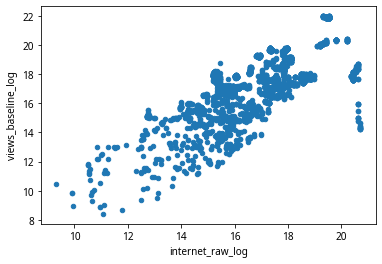

In [58]:
df_population.plot.scatter(x='internet_raw_log', y='views_baseline_log')

<AxesSubplot:xlabel='internet_raw_log', ylabel='view_country_article_log'>

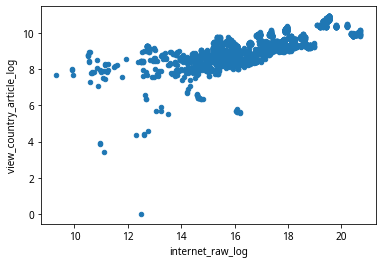

In [59]:
df_population.plot.scatter(x='internet_raw_log', y='view_country_article_log')

<AxesSubplot:xlabel='internet_percentage', ylabel='GDP_pc_log'>

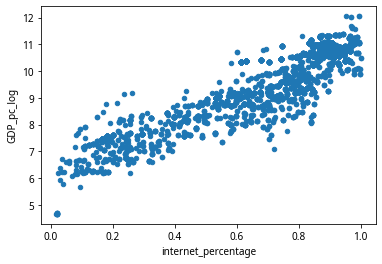

In [57]:
df_population.plot.scatter(x='internet_percentage', y='GDP_pc_log')